In [251]:
import os

import pandas as pd
import matplotlib.pyplot
import seaborn as sns
%matplotlib inline
sns.set()

In [253]:
def read_parquet_folder_as_pandas(path, verbosity=1):
    files = [f for f in os.listdir(path) if f.endswith("parquet")]

    df_list = [pd.read_parquet(os.path.join(path, f)) for f in files]
    df = pd.concat(df_list, ignore_index=True)

    return df


def read_parquet_as_pandas(path, verbosity=1):
    """Workaround for pandas not being able to read folder-style parquet files.
    """
    if os.path.isdir(path):
        return read_parquet_folder_as_pandas(path, verbosity)
    else:
        return pd.read_parquet(path)

In [288]:
session_df = pd.read_parquet("output/ifood/dataset/session")
restaurant_df = pd.read_csv("output/ifood/dataset/restaurants_with_contents.csv")
availability_df = pd.read_parquet("output/ifood/dataset/availability")
review_df = read_parquet_as_pandas("output/ifood/ufg_dataset_all/info_review")
delivery_df = read_parquet_as_pandas("output/ifood/ufg_dataset_all/info_delivery_time")

/home/fernando/.conda/envs/recommendation-system/lib/python3.6/site-packages/pyarrow/pandas_compat.py:752: FutureWarning: .labels was deprecated in version 0.24.0. Use .codes instead.
  labels, = index.labels


# Análise Exploratória dos Dados

## Contas

### Geral

Quantidade de contas:

In [170]:
num_accounts = session_df.account_id.nunique()
num_accounts

262219

### Compras

Quantidade de contas com alguma compra:

In [171]:
num_buying_accounts = session_df[session_df.buy == 1].account_id.nunique()
"%d (%.2f%%)" % (num_buying_accounts, (num_buying_accounts / num_accounts * 100))

'95506 (36.42%)'

Quantidade de contas com mais de 2 compras:

In [172]:
buys_per_account = session_df.groupby("account_id")["buy"].sum()
num_accounts_2_buys = len(buys_per_account[buys_per_account >= 2])
"%d (%.2f%%)" % (num_accounts_2_buys, (num_accounts_2_buys / num_accounts * 100))

'79542 (30.33%)'

Quantidade de contas com mais de 3 compras:

In [173]:
num_accounts_3_buys = len(buys_per_account[buys_per_account >= 3])
"%d (%.2f%%)" % (num_accounts_3_buys, (num_accounts_3_buys / num_accounts * 100))

'66273 (25.27%)'

Quantidade de contas com mais de 4 compras:

In [174]:
num_accounts_4_buys = len(buys_per_account[buys_per_account >= 4])
"%d (%.2f%%)" % (num_accounts_4_buys, (num_accounts_4_buys / num_accounts * 100))

'57141 (21.79%)'

Quantidade de contas com mais de 5 compras:

In [175]:
num_accounts_5_buys = len(buys_per_account[buys_per_account >= 5])
"%d (%.2f%%)" % (num_accounts_5_buys, (num_accounts_5_buys / num_accounts * 100))

'49769 (18.98%)'

Distribuição de compras por conta:

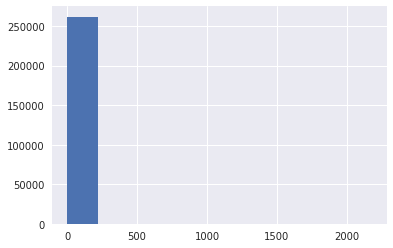

In [176]:
buys_per_account.hist()

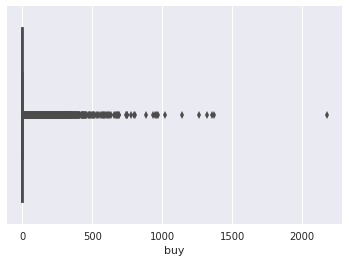

In [177]:
sns.boxplot(buys_per_account)

In [178]:
buys_per_account.describe()

count    262219.000000
mean          5.401843
std          22.371785
min           0.000000
25%           0.000000
50%           0.000000
75%           3.000000
max        2177.000000
Name: buy, dtype: float64

Distribuição de compras por conta, considerando apenas contas com pelo menos uma compra:

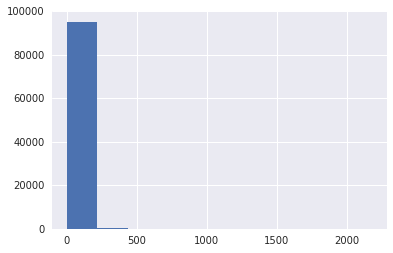

In [179]:
buys_per_buying_account = session_df[session_df.buy == 1].groupby("account_id")["buy"].sum()
buys_per_buying_account.hist()

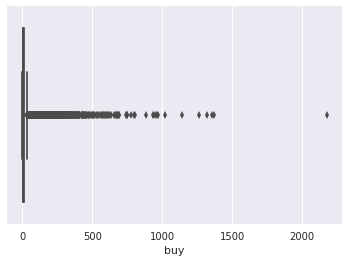

In [180]:
sns.boxplot(buys_per_buying_account)

In [181]:
buys_per_buying_account.describe()

count    95506.000000
mean        14.831173
std         35.132772
min          1.000000
25%          2.000000
50%          5.000000
75%         14.000000
max       2177.000000
Name: buy, dtype: float64

Distribuição de compras por conta, considerando apenas contas com pelo menos uma compra e desconsiderando outliers:

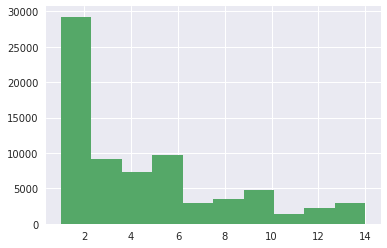

In [182]:
buys_per_buying_account[buys_per_buying_account <= 14].hist()
buys_per_session.hist()

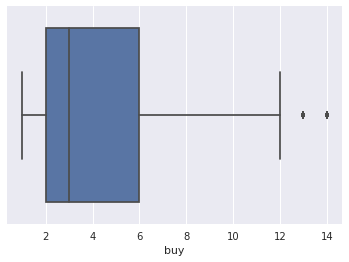

In [183]:
sns.boxplot(buys_per_buying_account[buys_per_buying_account <= 14])

In [184]:
buys_per_buying_account[buys_per_buying_account <= 14].describe()

count    73368.000000
mean         4.496811
std          3.550333
min          1.000000
25%          2.000000
50%          3.000000
75%          6.000000
max         14.000000
Name: buy, dtype: float64

### Visitas

Distribuição de visitas por conta:

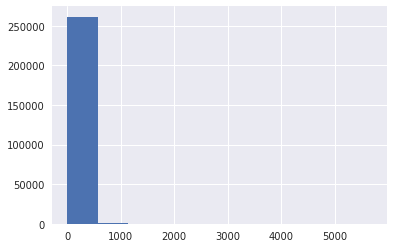

In [185]:
visits_per_account = session_df.groupby("account_id")["session_id"].count()
visits_per_account.hist()

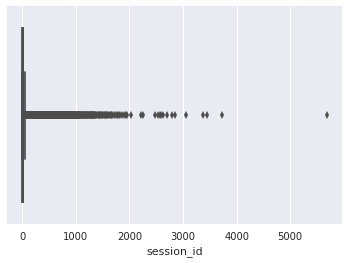

In [186]:
sns.boxplot(visits_per_account)

In [187]:
visits_per_account.describe()

count    262219.000000
mean         24.951796
std          69.924968
min           1.000000
25%           2.000000
50%           6.000000
75%          20.000000
max        5683.000000
Name: session_id, dtype: float64

Distribuição de visitas por conta, desconsiderando os outliers:

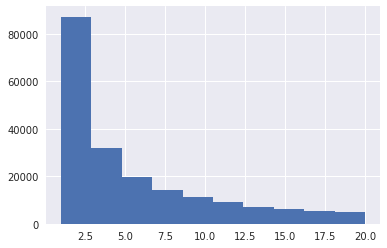

In [188]:
visits_per_account[visits_per_account <= 20].hist()

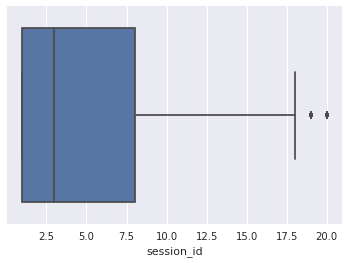

In [189]:
sns.boxplot(visits_per_account[visits_per_account <= 20])

In [190]:
visits_per_account[visits_per_account <= 20].describe()

count    197201.000000
mean          5.288842
std           5.066964
min           1.000000
25%           1.000000
50%           3.000000
75%           8.000000
max          20.000000
Name: session_id, dtype: float64

Distribuição de visitas das contas que fizeram alguma compra:

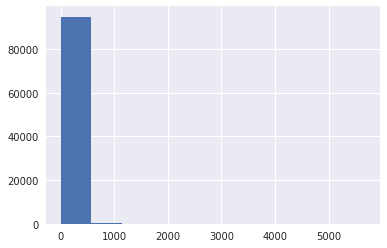

In [191]:
visits_per_buying_account = visits_per_account[buys_per_account >= 1]
visits_per_buying_account.hist()

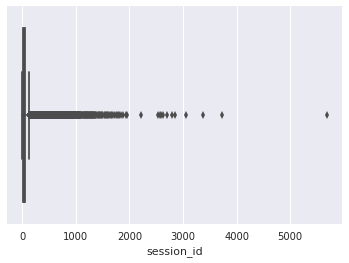

In [192]:
sns.boxplot(visits_per_buying_account)

In [193]:
visits_per_buying_account.describe()

count    95506.000000
mean        53.874772
std        103.774001
min          1.000000
25%          9.000000
50%         23.000000
75%         57.000000
max       5683.000000
Name: session_id, dtype: float64

Distribuição de visitas das contas que fizeram alguma compra, desconsiderando outliers:

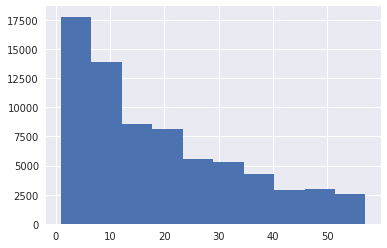

In [194]:
visits_per_buying_account[visits_per_buying_account <= 57].hist()

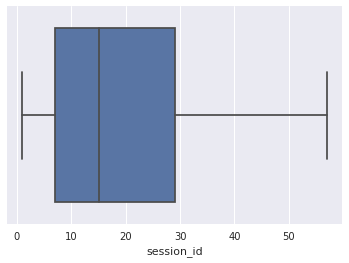

In [195]:
sns.boxplot(visits_per_buying_account[visits_per_buying_account <= 57])

In [196]:
visits_per_buying_account[visits_per_buying_account <= 57].describe()

count    71889.000000
mean        18.940241
std         14.863544
min          1.000000
25%          7.000000
50%         15.000000
75%         29.000000
max         57.000000
Name: session_id, dtype: float64

## Restaurantes

### Geral

Quantidade de restaurantes:

In [197]:
num_restaurants = session_df.merchant_id.nunique()
num_restaurants

1835

Distribuição de restaurantes por tipo de comida:

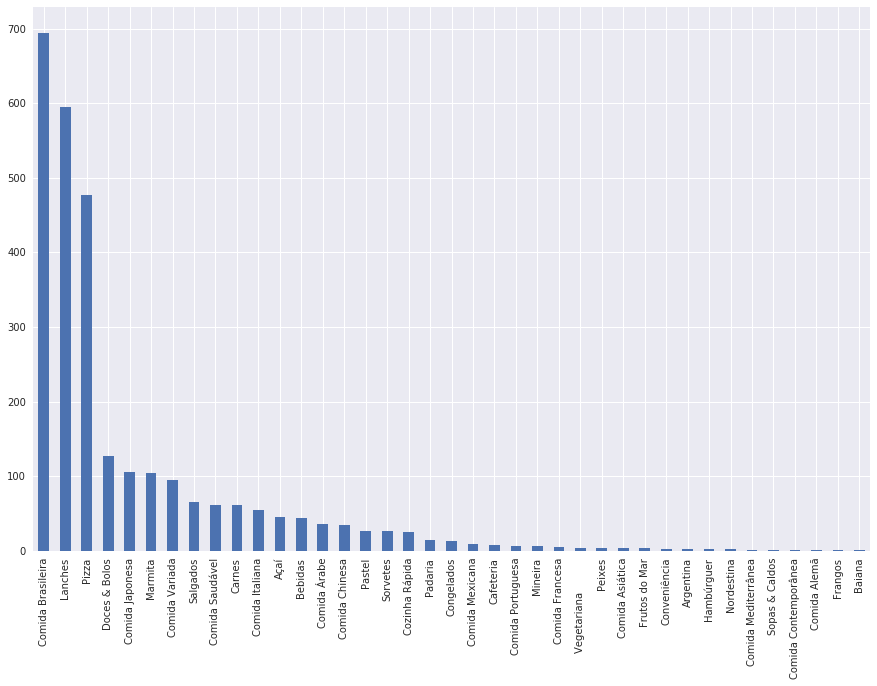

In [198]:
restaurant_df.dish_description.value_counts().plot(kind="bar", figsize=(15, 10))

### Compras

Quantidade de restaurantes com alguma compra:

In [199]:
num_buying_restaurants = session_df[session_df.buy == 1].merchant_id.nunique()
"%d (%.2f%%)" % (num_buying_restaurants, (num_buying_restaurants / num_restaurants * 100))

'1226 (66.81%)'

Quantidade de restaurantes com pelo menos 2 compras:

In [200]:
buys_per_restaurant = session_df.groupby("merchant_id")["buy"].sum()
num_restaurants_2_buys = len(buys_per_restaurant[buys_per_restaurant >= 2])
"%d (%.2f%%)" % (num_restaurants_2_buys, (num_restaurants_2_buys / num_restaurants * 100))

'1211 (65.99%)'

Quantidade de restaurantes com pelo menos 3 compras:

In [201]:
num_restaurants_3_buys = len(buys_per_restaurant[buys_per_restaurant >= 3])
"%d (%.2f%%)" % (num_restaurants_3_buys, (num_restaurants_3_buys / num_restaurants * 100))

'1188 (64.74%)'

Quantidade de restaurantes com pelo menos 4 compras:

In [202]:
num_restaurants_4_buys = len(buys_per_restaurant[buys_per_restaurant >= 4])
"%d (%.2f%%)" % (num_restaurants_4_buys, (num_restaurants_4_buys / num_restaurants * 100))

'1181 (64.36%)'

Quantidade de restaurantes com pelo menos 5 compras:

In [203]:
num_restaurants_5_buys = len(buys_per_restaurant[buys_per_restaurant >= 5])
"%d (%.2f%%)" % (num_restaurants_5_buys, (num_restaurants_5_buys / num_restaurants * 100))

'1168 (63.65%)'

Distribuição de compras por restaurante:

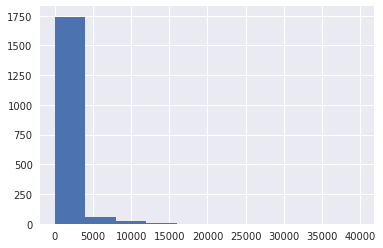

In [204]:
buys_per_restaurant.hist()

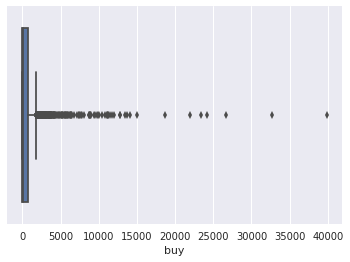

In [205]:
sns.boxplot(buys_per_restaurant)

In [206]:
buys_per_restaurant.describe()

count     1835.000000
mean       873.746049
std       2405.736660
min          0.000000
25%          0.000000
50%         98.000000
75%        692.000000
max      39864.000000
Name: buy, dtype: float64

Distribuição de compras por restaurante, desconsiderando outliers:

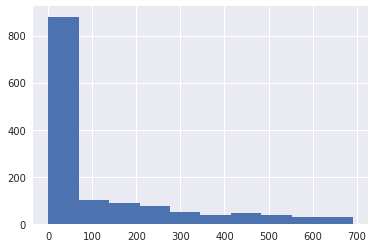

In [207]:
buys_per_restaurant[buys_per_restaurant <= 692].hist()

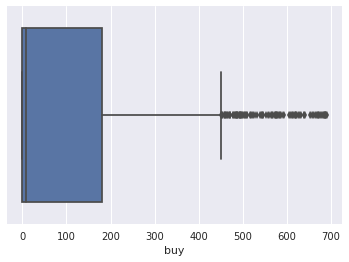

In [208]:
sns.boxplot(buys_per_restaurant[buys_per_restaurant <= 692])

Quantidade de compras por tipo de comida:

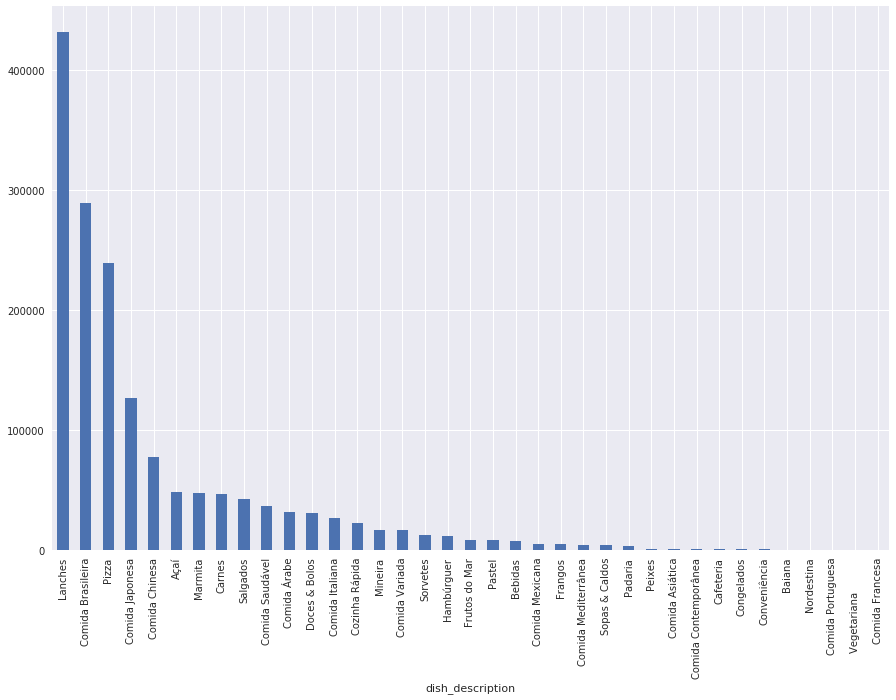

In [209]:
session_with_dish_df = session_df.merge(restaurant_df[["merchant_id", "dish_description"]], on="merchant_id")
buys_per_dish = session_with_dish_df.groupby("dish_description")["buy"].sum()
buys_per_dish.sort_values(ascending=False).plot(kind="bar", figsize=(15, 10))

### Visitas

Distribuição de visitas por restaurante:

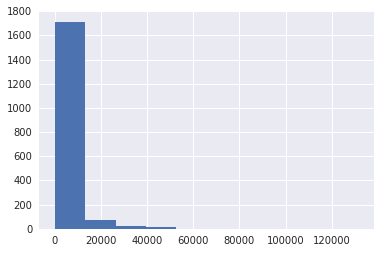

In [210]:
visits_per_restaurant = session_df.groupby("merchant_id")["session_id"].count()
visits_per_restaurant.hist()

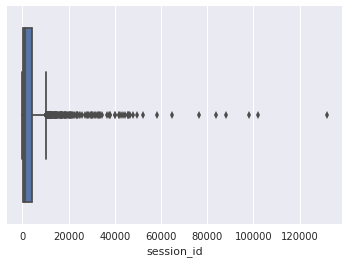

In [211]:
sns.boxplot(visits_per_restaurant)

In [212]:
visits_per_restaurant.describe()

count      1835.000000
mean       3953.724796
std        8704.270866
min           1.000000
25%         107.000000
50%        1088.000000
75%        4172.500000
max      131739.000000
Name: session_id, dtype: float64

Distribuição de visitas por restaurante, desconsiderando outliers:

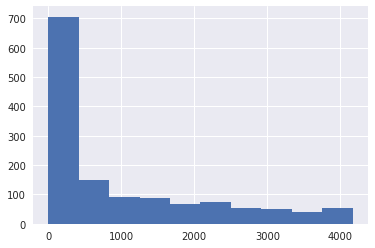

In [213]:
visits_per_restaurant[visits_per_restaurant <= 4173].hist()

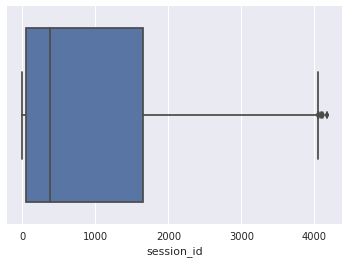

In [214]:
sns.boxplot(visits_per_restaurant[visits_per_restaurant <= 4173])

Quantidade de visitas por tipo de comida:

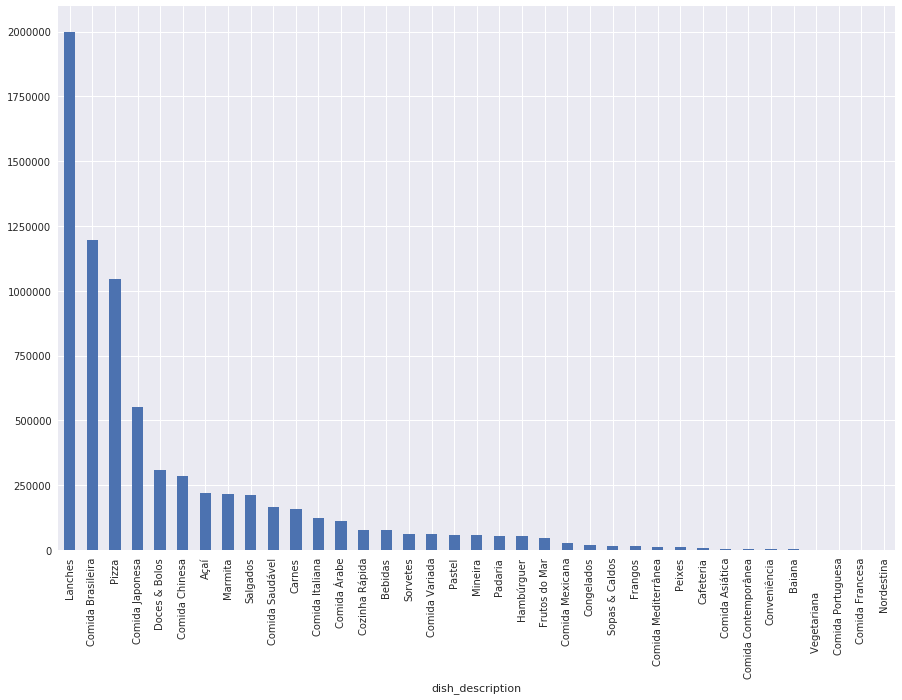

In [215]:
visits_per_dish = session_with_dish_df.groupby("dish_description")["session_id"].count()
visits_per_dish.sort_values(ascending=False).plot(kind="bar", figsize=(15, 10))

## Interações

### Geral

Quantidade de interações:

In [216]:
num_interactions = len(session_df)
num_interactions

7255085

Quantidade de compras:

In [217]:
num_buys = len(session_df[session_df.buy == 1])
"%d (%.2f%%)" % (num_buys, (num_buys / num_interactions * 100))

'1603324 (22.10%)'

### Compras

Quantidade de contas que compraram em pelo menos 1 restaurante distinto:

In [218]:
distinct_buys_per_account = session_df[session_df.buy == 1].groupby(["account_id"]).merchant_id.nunique()
num_accounts_1_distinct_buys = len(distinct_buys_per_account[distinct_buys_per_account >= 1])
"%d (%.2f%%)" % (num_accounts_1_distinct_buys, (num_accounts_1_distinct_buys / num_accounts * 100))

'95506 (36.42%)'

Quantidade de contas que compraram em pelo menos 2 restaurantes distintos:

In [219]:
num_accounts_2_distinct_buys = len(distinct_buys_per_account[distinct_buys_per_account >= 2])
"%d (%.2f%%)" % (num_accounts_2_distinct_buys, (num_accounts_2_distinct_buys / num_accounts * 100))

'41467 (15.81%)'

Quantidade de contas que compraram em pelo menos 3 restaurantes distintos:

In [220]:
num_accounts_3_distinct_buys = len(distinct_buys_per_account[distinct_buys_per_account >= 3])
"%d (%.2f%%)" % (num_accounts_3_distinct_buys, (num_accounts_3_distinct_buys / num_accounts * 100))

'22957 (8.75%)'

Quantidade de contas que compraram em pelo menos 4 restaurantes distintos:

In [221]:
num_accounts_4_distinct_buys = len(distinct_buys_per_account[distinct_buys_per_account >= 4])
"%d (%.2f%%)" % (num_accounts_4_distinct_buys, (num_accounts_4_distinct_buys / num_accounts * 100))

'13837 (5.28%)'

Quantidade de contas que compraram em pelo menos 5 restaurantes distintos:

In [222]:
num_accounts_5_distinct_buys = len(distinct_buys_per_account[distinct_buys_per_account >= 5])
"%d (%.2f%%)" % (num_accounts_5_distinct_buys, (num_accounts_5_distinct_buys / num_accounts * 100))

'8734 (3.33%)'

Distribuição de restaurantes distintos os usuários fizeram compras:

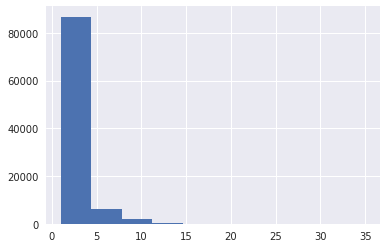

In [223]:
distinct_buys_per_account.hist()

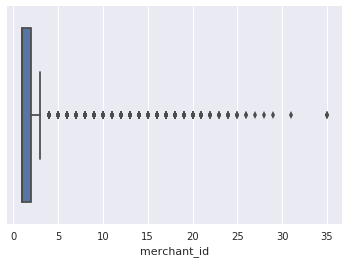

In [224]:
sns.boxplot(distinct_buys_per_account)

In [225]:
distinct_buys_per_account.describe()

count    95506.000000
mean         2.098852
std          1.974710
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         35.000000
Name: merchant_id, dtype: float64

### Visitas

Distribuição de restaurantes distintos os usuários visitaram:

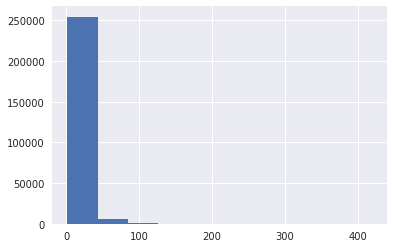

In [226]:
distinct_visits_per_account = session_df.groupby(["account_id"]).merchant_id.nunique()
distinct_visits_per_account.hist()

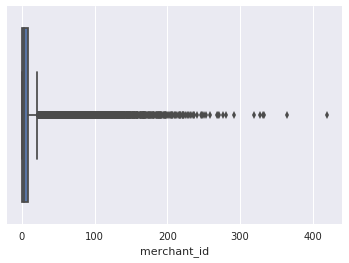

In [227]:
sns.boxplot(distinct_visits_per_account)

In [228]:
distinct_visits_per_account.describe()

count    262219.000000
mean          7.986443
std          14.019430
min           1.000000
25%           1.000000
50%           3.000000
75%           9.000000
max         419.000000
Name: merchant_id, dtype: float64

### Compras únicas

Quantidade de compras únicas (par conta / restaurante com compra):

In [229]:
buys_per_account_and_merchant = session_df[session_df.buy == 1].groupby(["account_id", "merchant_id"]).session_id.nunique()
len(buys_per_account_and_merchant)

200453

### Visitas recorrentes

Quantidade de visitas recorrentes (pelo menos 2 vezes no mesmo restaurante):

In [230]:
visits_per_account_and_merchant = session_df.groupby(["account_id", "merchant_id"]).session_id.nunique()
num_recurrent_visits_2 = len(visits_per_account_and_merchant[visits_per_account_and_merchant >= 2])
"%d (%.2f%%)" % (num_recurrent_visits_2, (num_recurrent_visits_2 / len(visits_per_account_and_merchant) * 100))

'377045 (18.00%)'

Quantidade de visitas recorrentes (pelo menos 3 vezes no mesmo restaurante):

In [231]:
num_recurrent_visits_3 = len(visits_per_account_and_merchant[visits_per_account_and_merchant >= 3])
"%d (%.2f%%)" % (num_recurrent_visits_3, (num_recurrent_visits_3 / len(visits_per_account_and_merchant) * 100))

'134783 (6.44%)'

Quantidade de visitas recorrentes (pelo menos 4 vezes no mesmo restaurante):

In [232]:
num_recurrent_visits_4 = len(visits_per_account_and_merchant[visits_per_account_and_merchant >= 4])
"%d (%.2f%%)" % (num_recurrent_visits_4, (num_recurrent_visits_4 / len(visits_per_account_and_merchant) * 100))

'64143 (3.06%)'

Quantidade de visitas recorrentes (pelo menos 5 vezes no mesmo restaurante):

In [233]:
num_recurrent_visits_5 = len(visits_per_account_and_merchant[visits_per_account_and_merchant >= 5])
"%d (%.2f%%)" % (num_recurrent_visits_5, (num_recurrent_visits_5 / len(visits_per_account_and_merchant) * 100))

'35759 (1.71%)'

Distribuição de visitas por conta e restaurante:

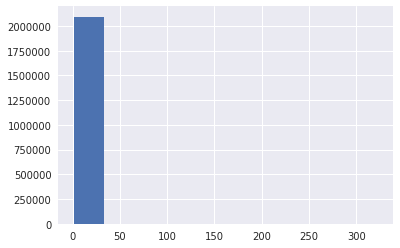

In [234]:
visits_per_account_and_merchant.hist()

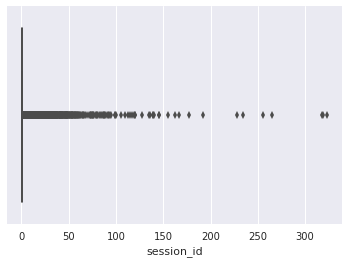

In [235]:
sns.boxplot(visits_per_account_and_merchant)

In [236]:
visits_per_account_and_merchant.describe()

count    2.094197e+06
mean     1.336915e+00
std      1.365155e+00
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      3.230000e+02
Name: session_id, dtype: float64

Distribuição de visitas por conta e restaurante, considerando até 10:

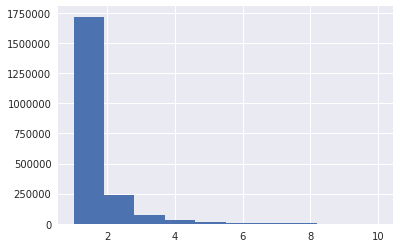

In [237]:
visits_per_account_and_merchant[visits_per_account_and_merchant<=10].hist()

### Por shift

Visitas por shift:

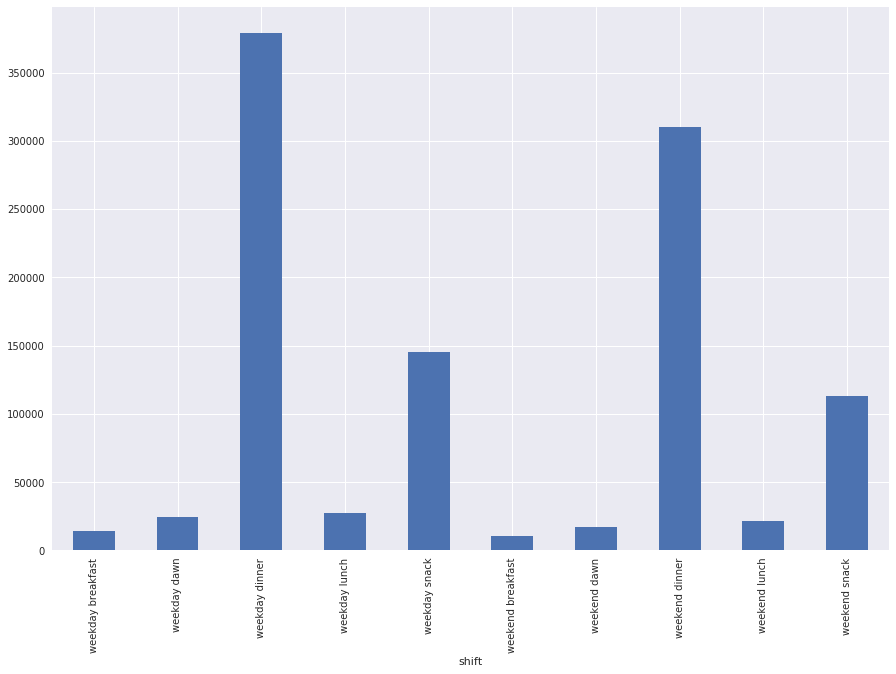

In [240]:
session_df.groupby("shift")["session_id"].nunique().plot(kind="bar", figsize=(15, 10))

Compras por shift:

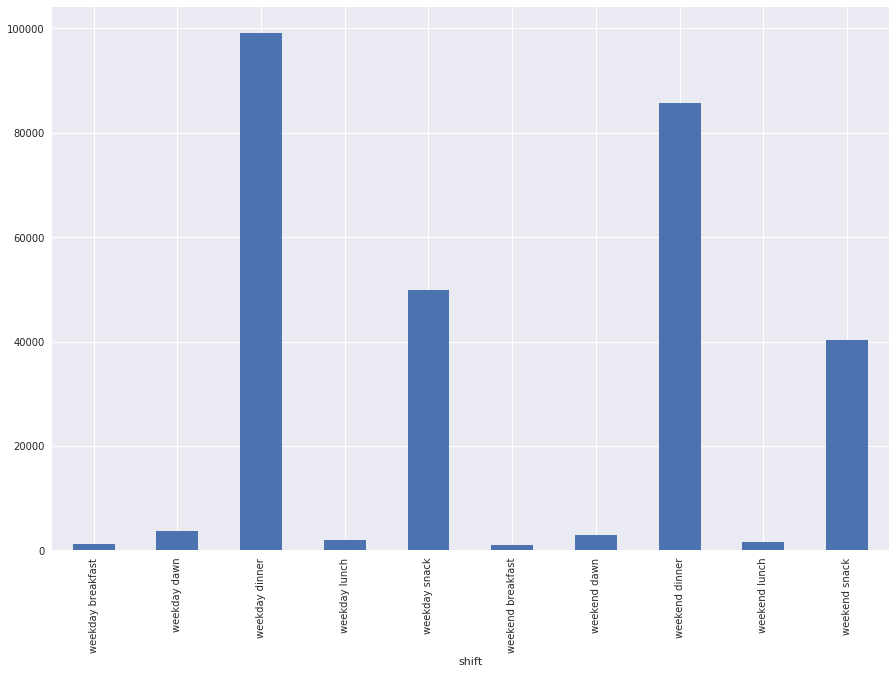

In [241]:
session_df[session_df.buy == 1].groupby("shift")["session_id"].nunique().plot(kind="bar", figsize=(15, 10))

Número de restaurantes disponíveis por shift:

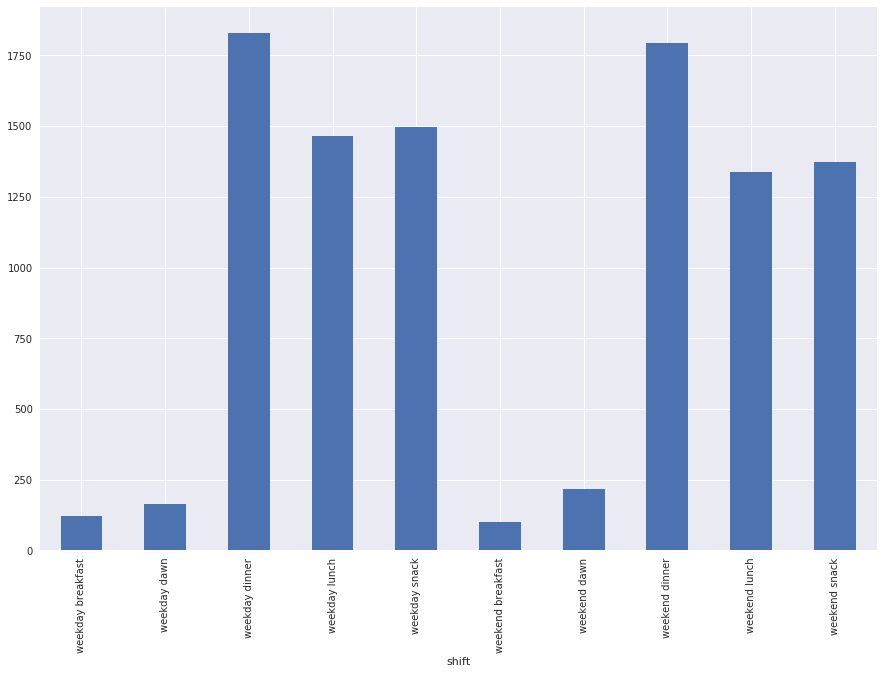

In [242]:
availability_df.groupby("shift")["merchant_id"].nunique().plot(kind="bar", figsize=(15, 10))

### Por dia da semana

Visitas por dia de semana:

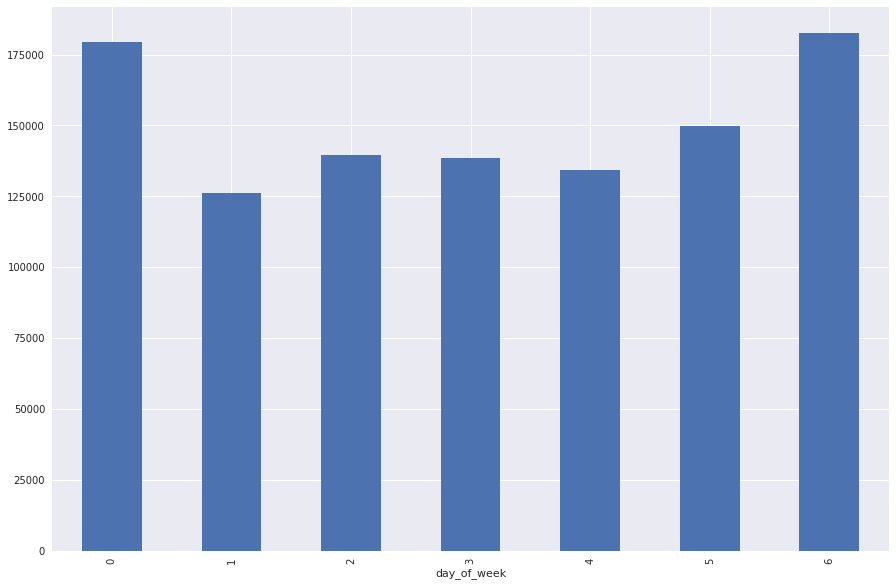

In [243]:
session_df.groupby("day_of_week")["session_id"].nunique().plot(kind="bar", figsize=(15, 10))

Compras por dia da semana:

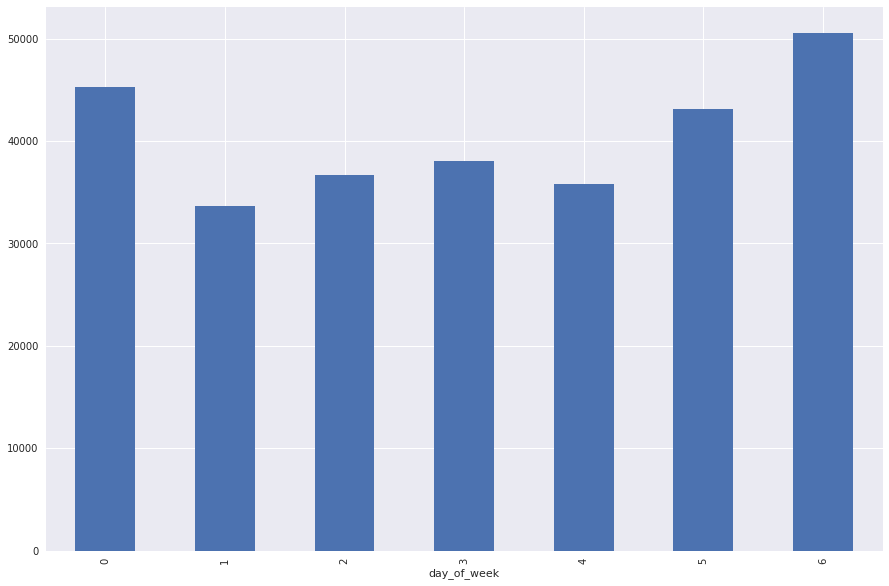

In [244]:
session_df[session_df.buy == 1].groupby("day_of_week")["session_id"].nunique().plot(kind="bar", figsize=(15, 10))

## Reviews

### Geral

Distribuição de scores:

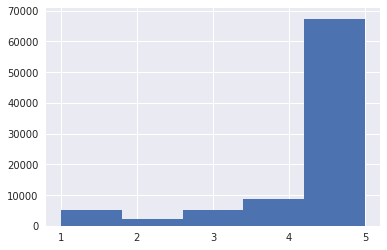

In [270]:
ax = review_df.evaluation_score_average.hist(bins=5)
ax.locator_params(integer=True)

In [273]:
review_df.evaluation_score_average.describe()

count    88589.000000
mean         4.481538
std          1.096715
min          1.000000
25%          5.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: evaluation_score_average, dtype: float64

In [274]:
review_df.evaluation_score_average.value_counts()

5.00    67396
4.00     8858
1.00     5076
3.00     5005
2.00     2252
4.75        1
3.25        1
Name: evaluation_score_average, dtype: int64